In [1]:
#Здесь расположим все импорты
import pandas as pd
import seaborn as sns
import matplotlib
import matplotlib.pyplot as plt
import numpy as np

import warnings
warnings.filterwarnings('ignore')

1. Загрузите и прочитайте в pandas следующий датасет. Обратите внимание, что датасет собран «криво», поэтому прежде чем он «правильно» загрузится, необходимо его обработать.

In [2]:
cars_df = pd.read_csv("data/cars_sampled.csv")
cars_df.head(3)

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
0,30/03/2016 13:51,Zu_verkaufen,private,offer,4450,test,limousine,2003,manual,150,3er,150000,3,diesel,bmw,NaN,30/03/2016 0:00,20257,7/4/2016 4:44
1,7/3/2016 9:54,Volvo_XC90_2.4D_Summum,private,offer,13299,control,suv,2005,manual,163,xc_reihe,150000,6,diesel,volvo,no,7/3/2016 0:00,88045,26/03/2016 13:17
2,1/4/2016 0:57,Volkswagen_Touran,private,offer,3200,test,bus,2003,manual,101,touran,150000,11,diesel,volkswagen,NaN,31/03/2016 0:00,27449,1/4/2016 8:40


2. Сделайте описательную статистику: размер, типы переменных, пустые значения, уникальные имена и т.д.

In [3]:
print(f'Размер датасета: {cars_df.shape}, где \
      \nколичество наблюдений - {cars_df.shape[0]}, \
      \nколичество параметров - {cars_df.shape[1]}')

Размер датасета: (50001, 19), где       
количество наблюдений - 50001,       
количество параметров - 19


In [4]:
print("Типы каждого поля и шкала (уникальные имена):")
pd.concat([
    cars_df.dtypes.rename('data_type'),
    cars_df.apply(lambda x: x.unique()).rename('scale')
], axis = 1)

Типы каждого поля и шкала (уникальные имена):


,data_type,scale
dateCrawled,object,"[30/03/2016 13:51, 7/3/2016 9:54, 1/4/2016 0:5..."
name,object,"[Zu_verkaufen, Volvo_XC90_2.4D_Summum, Volkswa..."
seller,object,"[private, commercial]"
offerType,object,"[offer, request]"
price,int64,"[4450, 13299, 3200, 4500, 18750, 988, 400, 139..."
abtest,object,"[test, control]"
vehicleType,object,"[limousine, suv, bus, small car, station wagon..."
yearOfRegistration,int64,"[2003, 2005, 2006, 2008, 1995, 1996, 1997, 200..."
gearbox,object,"[manual, automatic, nan]"
powerPS,int64,"[150, 163, 101, 86, 185, 90, 0, 136, 122, 140,..."


In [5]:
print(f'Количество уникальных значений в каждом столбце: \n{cars_df.nunique()}')

Количество уникальных значений в каждом столбце: 
dateCrawled            12039
name                   38766
seller                     2
offerType                  2
price                   2393
abtest                     2
vehicleType                8
yearOfRegistration        97
gearbox                    2
powerPS                  460
model                    248
kilometer                 13
monthOfRegistration       13
fuelType                   7
brand                     40
notRepairedDamage          2
dateCreated               75
postalCode              7018
lastSeen               10413
dtype: int64


In [6]:
print('Описательная статистика:')
cars_df.describe()

Описательная статистика:


,price,yearOfRegistration,powerPS,kilometer,monthOfRegistration,postalCode
count,5.000100e+04,50001.000000,50001.000000,50001.000000,50001.000000,50001.000000
mean,6.559865e+03,2005.544229,116.496130,125613.687726,5.743725,50775.216696
std,8.581847e+04,122.991832,230.567709,40205.234483,3.711345,25743.701933
min,0.000000e+00,1000.000000,0.000000,5000.000000,0.000000,1067.000000
25%,1.150000e+03,1999.000000,69.000000,125000.000000,3.000000,30559.000000
50%,2.950000e+03,2003.000000,105.000000,150000.000000,6.000000,49504.000000
75%,7.190000e+03,2008.000000,150.000000,150000.000000,9.000000,71404.000000
max,1.234568e+07,9999.000000,19312.000000,150000.000000,12.000000,99998.000000


In [7]:
print(f'Пустые значения: \n{cars_df.isna().sum()})')

Пустые значения: 
dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5188
yearOfRegistration        0
gearbox                2824
powerPS                   0
model                  2758
kilometer                 0
monthOfRegistration       0
fuelType               4503
brand                     0
notRepairedDamage      9716
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64)


Матрица коррелиции признаков:


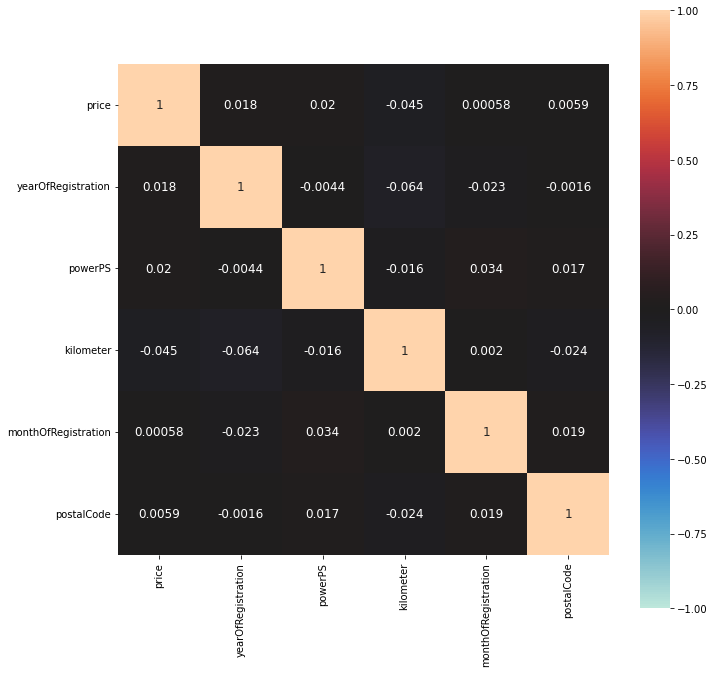

In [8]:
print('Матрица коррелиции признаков:')
ax = sns.heatmap(
    cars_df.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)

Все признаки слабо коррелируют между собой. Наиболее сильная корреляция наблюдается между признаками:
* yearOfRegistration и kilometer
* price и kilometer
* powerPS и monthOfRegistration

3. Поработайте с типами переменных. Все числовые значения переведите в формат int.

In [9]:
cars_df[['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']] = \
cars_df[['price', 'yearOfRegistration', 'powerPS', 'kilometer', 'monthOfRegistration', 'postalCode']].astype(int)

In [10]:
print("Типы каждого поля:")
pd.concat([
    cars_df.dtypes.rename('data_type'),
], axis = 1)

Типы каждого поля:


,data_type
dateCrawled,object
name,object
seller,object
offerType,object
price,int32
abtest,object
vehicleType,object
yearOfRegistration,int32
gearbox,object
powerPS,int32


4. Поработайте со столбцом price. Постройте гистограмму, найдите выбросы (ящиковая диаграмма), удалите аномальные значения, постарайтесь привести к нормальному распределению.

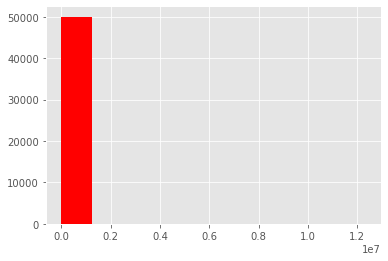

In [11]:
matplotlib.style.use('ggplot')
%matplotlib inline
_ = plt.hist(cars_df['price'], color = 'red')

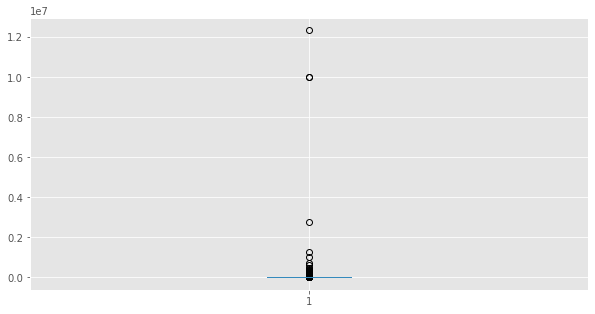

In [12]:
plt.rcParams['figure.figsize']=(10, 5)
plt.boxplot(np.array(list(cars_df['price'])).astype(np.int))
plt.show()

In [13]:
# Найдем значения, которые выше максимального или ниже минимального значений и заменим их на nan
for i in ['price']:
    q75, q25 = np.percentile(cars_df.loc[:, i], [75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    cars_df.loc[cars_df[i] < min, i] = np.nan
    cars_df.loc[cars_df[i] > max, i] = np.nan
    
    print(max)
    print(min)

16250.0
-7910.0


In [14]:
# Удалим эти нулевые значения
cars_df.dropna(subset=['price'], inplace=True)
cars_df.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5113
yearOfRegistration        0
gearbox                2748
powerPS                   0
model                  2598
kilometer                 0
monthOfRegistration       0
fuelType               4394
brand                     0
notRepairedDamage      9507
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [15]:
# Проверим, что нет значений, выше максимального
cars_df[cars_df['price'] >= 16250.0]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen
11246,4/4/2016 12:47,Mercedes_Benz__E_220_CDI_Blue_Efficiency,private,offer,16250.0,control,station wagon,2011,manual,170,e_klasse,150000,2,diesel,mercedes_benz,no,4/4/2016 0:00,63628,6/4/2016 13:46
19780,12/3/2016 18:58,Audi_A4_Cabriolet_2.0_TFSI_multitronic,private,offer,16250.0,test,cabrio,2007,automatic,200,a4,80000,6,petrol,audi,no,12/3/2016 0:00,52393,3/4/2016 11:51
32070,30/03/2016 9:54,Golf_VI_GTI__2.0__BJ_2011,private,offer,16250.0,control,small car,2011,manual,211,golf,50000,11,petrol,volkswagen,no,30/03/2016 0:00,63801,7/4/2016 1:15
39582,21/03/2016 13:37,Mercedes_Benz_C_180_T_Kompressor_Automatik_Ava...,private,offer,16250.0,test,station wagon,2009,automatic,156,c_klasse,40000,1,petrol,mercedes_benz,no,21/03/2016 0:00,22941,6/4/2016 8:45


In [16]:
# Проверим, что нет значений, ниже минимального
cars_df[cars_df['price'] <= -7910.0]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen


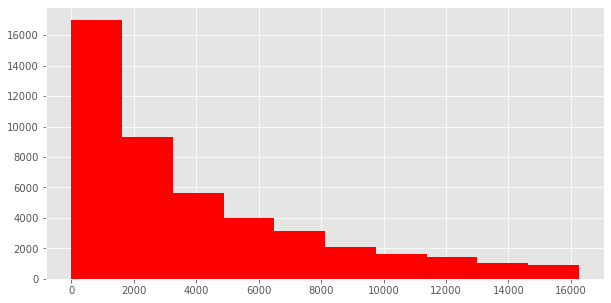

In [17]:
# Смотрим, что изменилось
_ = plt.hist(cars_df['price'], color = 'red')

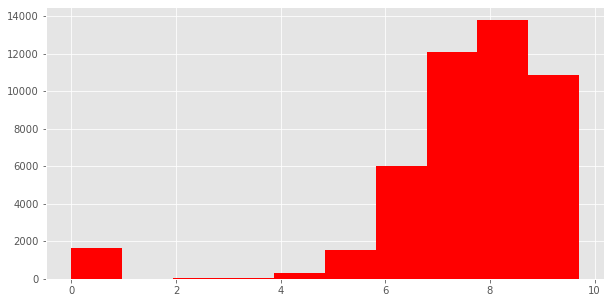

In [18]:
# Проведем нормализацию с помощью log:
cars_df['price'] = np.log(cars_df['price'] + 1)
_ = plt.hist(cars_df['price'], color = 'red')

5. Аналогично поработайте и с другими «важными для целевой функции price» параметрами (powerPS, yearOfRegistration, kilometer и т.д). «Важность» докажите через коэффициент корреляции. Сделайте визуализацию.

Матрица коррелиции признаков:


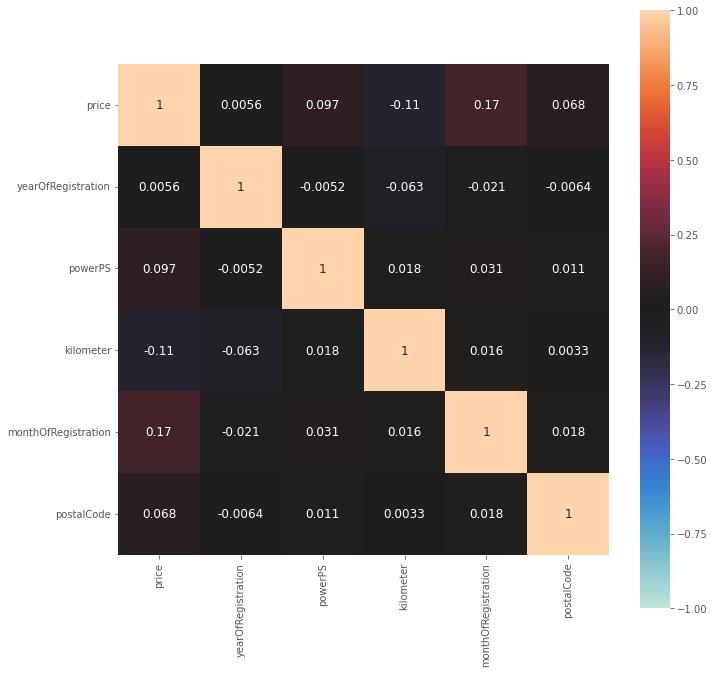

In [19]:
# Заново посмотрим корреляцию
print('Матрица коррелиции признаков:')
ax = sns.heatmap(
    cars_df.corr(),
    annot=True,
    annot_kws={'size': 12},
    vmin=-1, vmax=1, center=0,
    square=True
)
ax.figure.set_size_inches(11, 11)

Как мы могли заметить по матрице корреляции, наиболее важные для целевой переменной параметры (по степени значимости):
1) monthOfRegistration
2) kilometer

Параметры powerPS, yearOfRegistration и postalCode имеют слишком слабую зависимость с целевой переменной.
Но вообще, по-хорошему, все факторы слишком слабо коррелируют между собой

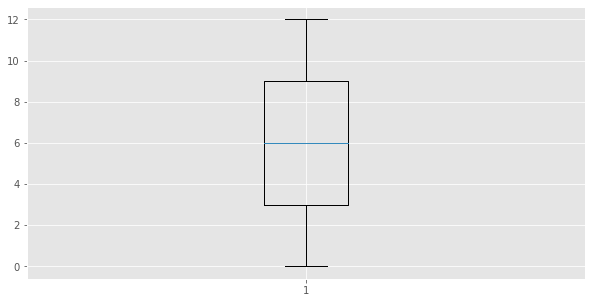

In [20]:
# Выбросов нет
plt.boxplot(np.array(list(cars_df['monthOfRegistration'])).astype(np.int))
plt.show()

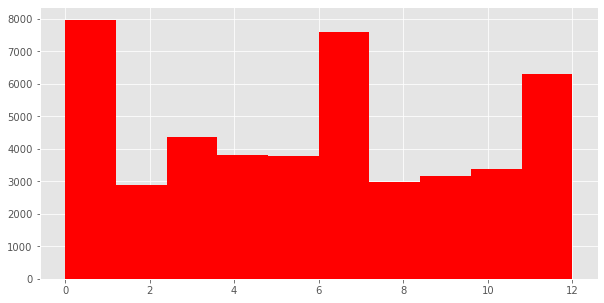

In [21]:
_ = plt.hist(cars_df['monthOfRegistration'], color = 'red')

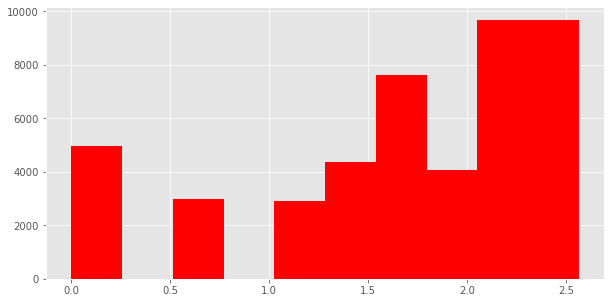

In [22]:
# Проведем нормализацию с помощью log:
cars_df['monthOfRegistration'] = np.log(cars_df['monthOfRegistration'] + 1)
_ = plt.hist(cars_df['monthOfRegistration'], color = 'red')

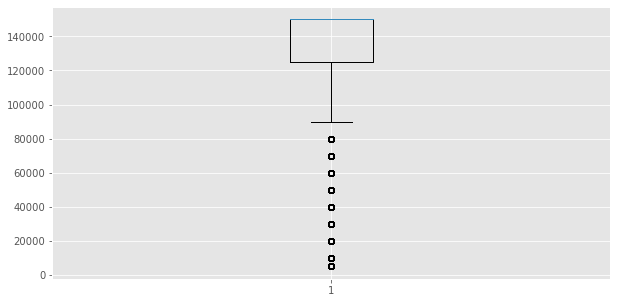

In [23]:
plt.boxplot(np.array(list(cars_df['kilometer'])).astype(np.int))
plt.show()

In [24]:
# Почистим выбросы
# Найдем значения, которые выше максимального или ниже минимального значений и заменим их на nan
for i in ['kilometer']:
    q75, q25 = np.percentile(cars_df.loc[:, i], [75,25])
    intr_qr = q75-q25

    max = q75+(1.5*intr_qr)
    min = q25-(1.5*intr_qr)

    cars_df.loc[cars_df[i] < min, i] = np.nan
    cars_df.loc[cars_df[i] > max, i] = np.nan
    
    print(max)
    print(min)

187500.0
87500.0


In [25]:
# Проверим, что нет значений, выше максимального
cars_df[cars_df['kilometer'] >= 187500.0]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen


In [26]:
# Проверим, что нет значений, ниже минимального
cars_df[cars_df['kilometer'] <= 87500.0]

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,model,kilometer,monthOfRegistration,fuelType,brand,notRepairedDamage,dateCreated,postalCode,lastSeen


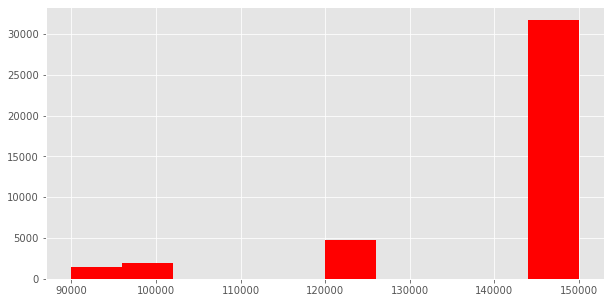

In [27]:
_ = plt.hist(cars_df['kilometer'], color = 'red')

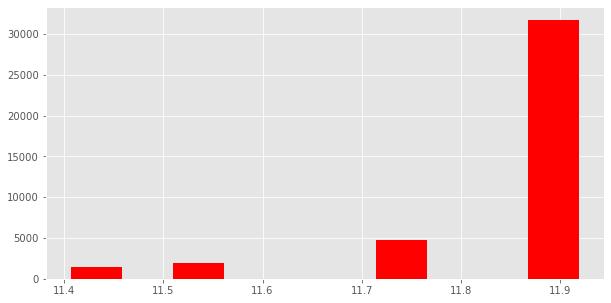

In [28]:
# Проведем нормализацию с помощью log:
cars_df['kilometer'] = np.log(cars_df['kilometer'] + 1)
_ = plt.hist(cars_df['kilometer'], color = 'red')

6. Постройте ящиковые диаграммы зависимости gearbox, fuelType, vehicleType, notRepairedDamage от price.

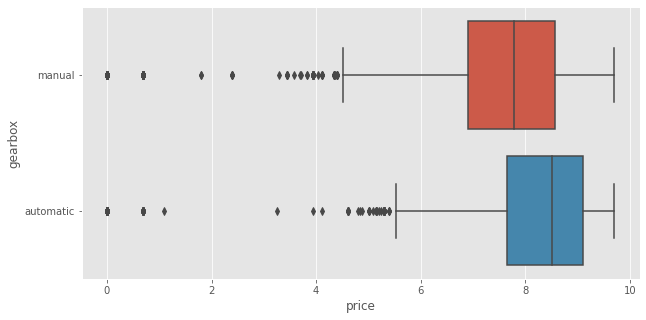

In [29]:
_ = sns.boxplot(cars_df['price'], cars_df['gearbox'])

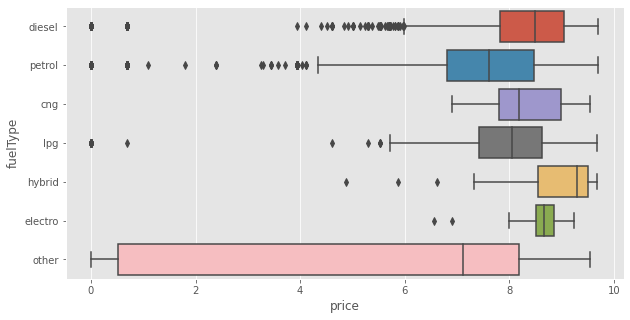

In [30]:
_ = sns.boxplot(cars_df['price'], cars_df['fuelType'])

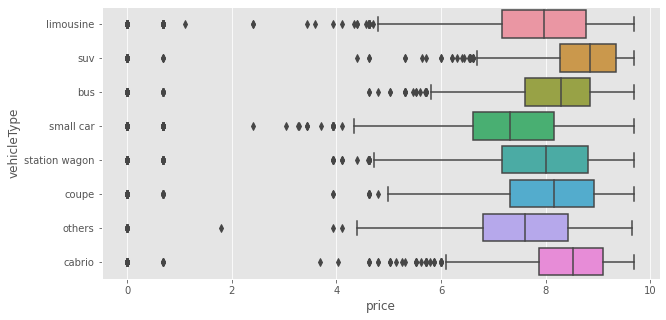

In [31]:
_ = sns.boxplot(cars_df['price'], cars_df['vehicleType'])

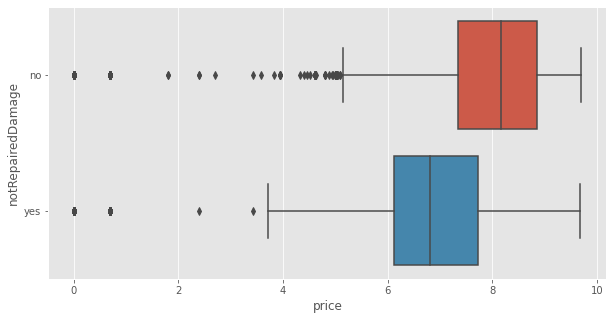

In [32]:
_ = sns.boxplot(cars_df['price'], cars_df['notRepairedDamage'])

Видно, что медианные значения многих признаков сильно сдвинуты. Выбросы присутствуют в каждом из зависимостей. На мой взгляд, избавление датасета от значений с малой частотой повлияет на дальнейшее исследование: данные с малой частотой чаще всего являются выбросами, от которых принято избавляться для того, чтобы привести данные к нормальному распределению.

7. Найдите пропуски. Удалите столбцы, которые содержат большое количество пропусков. В остальных случаях постарайтесь восстановить пропущенные значения.

In [33]:
cars_df.isnull().sum()

dateCrawled               0
name                      0
seller                    0
offerType                 0
price                     0
abtest                    0
vehicleType            5113
yearOfRegistration        0
gearbox                2748
powerPS                   0
model                  2598
kilometer              6471
monthOfRegistration       0
fuelType               4394
brand                     0
notRepairedDamage      9507
dateCreated               0
postalCode                0
lastSeen                  0
dtype: int64

In [34]:
# Больше всего пропущенных значений в столбце notRepairedDamage. Удалим его
cars_df.drop(columns=['notRepairedDamage'], axis=1, inplace = True)

Стоит заметить, что все остальные столбцы с пропущенными значениями являются категориальными, кроме параметра kilometer, значит их можно либо удалить, либо поставить наиболее популярное значение. Для этого рассмотрим количество уникальных значений в каждом из столбцов:

In [35]:
cars_df.nunique()

dateCrawled            11841
name                   35778
seller                     2
offerType                  2
price                   1546
abtest                     2
vehicleType                8
yearOfRegistration        93
gearbox                    2
powerPS                  394
model                    244
kilometer                  4
monthOfRegistration       13
fuelType                   7
brand                     40
dateCreated               71
postalCode              6915
lastSeen               10236
dtype: int64

Видим, что наибольший разброс в значениях имеет столбец model - его удаляем, для всех остальных поставим наиболее популярное значение.

In [36]:
cars_df.drop(columns=['model'], axis=1, inplace = True)

In [37]:
cars_df.gearbox.fillna(cars_df.gearbox.value_counts()[:1].index.to_list()[0], inplace = True)

In [38]:
cars_df.vehicleType.fillna(cars_df.vehicleType.value_counts()[:1].index.to_list()[0], inplace = True)

In [39]:
cars_df.fuelType.fillna(cars_df.fuelType.value_counts()[:1].index.to_list()[0], inplace = True)

В параметре kilometer заменим пропуски на максимальное значение:

In [40]:
cars_df.kilometer.fillna(cars_df.kilometer.max(), inplace = True)

Проверим, что все пропуски пропали:

In [41]:
cars_df.isnull().sum()

dateCrawled            0
name                   0
seller                 0
offerType              0
price                  0
abtest                 0
vehicleType            0
yearOfRegistration     0
gearbox                0
powerPS                0
kilometer              0
monthOfRegistration    0
fuelType               0
brand                  0
dateCreated            0
postalCode             0
lastSeen               0
dtype: int64

Супер!

In [42]:
# Для красоты еще поработаем с датами
cars_df.dateCrawled = cars_df.dateCrawled.astype('datetime64[ns]') 
cars_df.dateCreated = cars_df.dateCreated.astype('datetime64[ns]') 
cars_df.lastSeen = cars_df.lastSeen.astype('datetime64[ns]') 

cars_df.dateCrawled = cars_df.dateCrawled.dt.date
cars_df.dateCreated = cars_df.dateCreated.dt.date
cars_df.lastSeen = cars_df.lastSeen.dt.date

In [43]:
# Надо еще индекс сбросить
cars_df.reset_index(drop=True, inplace=True)

8. Сохраните полученный датасет и выведете его.

In [44]:
cars_df.to_csv('final_cars_df.csv')
cars_df

,dateCrawled,name,seller,offerType,price,abtest,vehicleType,yearOfRegistration,gearbox,powerPS,kilometer,monthOfRegistration,fuelType,brand,dateCreated,postalCode,lastSeen
0,2016-03-30,Zu_verkaufen,private,offer,8.400884,test,limousine,2003,manual,150,11.918397,1.386294,diesel,bmw,2016-03-30,20257,2016-07-04
1,2016-07-03,Volvo_XC90_2.4D_Summum,private,offer,9.495519,control,suv,2005,manual,163,11.918397,1.945910,diesel,volvo,2016-07-03,88045,2016-03-26
2,2016-01-04,Volkswagen_Touran,private,offer,8.071219,test,bus,2003,manual,101,11.918397,2.484907,diesel,volkswagen,2016-03-31,27449,2016-01-04
3,2016-03-19,Seat_Ibiza_1.4_16V_Reference,private,offer,8.412055,control,small car,2006,manual,86,11.918397,2.564949,petrol,seat,2016-03-19,34537,2016-07-04
4,2016-02-04,VW_Passat_35i_Facelift_Limousine_TÜV_Neu,private,offer,6.896694,test,limousine,1995,manual,90,11.918397,1.098612,petrol,volkswagen,2016-02-04,26826,2016-02-04
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
46239,2016-03-23,Opel_Astra_G_Caravan__Tuev_2/2018__Scheckheft_...,private,offer,7.736744,test,station wagon,2001,manual,101,11.918397,1.386294,petrol,opel,2016-03-23,27305,2016-04-04
46240,2016-03-04,Suche_VW_T5_Multivan,private,request,0.000000,test,bus,2005,manual,0,11.918397,0.000000,petrol,volkswagen,2016-03-04,29690,2016-05-04
46241,2016-03-14,[SUCHE]_BMW_e46_Coupe_330ci_M_Paket_Facelift__...,private,request,0.000000,test,coupe,2004,manual,0,11.918397,0.693147,petrol,bmw,2016-03-14,86956,2016-03-25
46242,2016-03-15,Verkaufe_mehrere_Fahrzeuge_zum_Verschrotten,commercial,offer,4.615121,control,station wagon,2000,manual,0,11.918397,2.197225,petrol,renault,2016-03-15,65232,2016-06-04


Спонсор работы на майских праздниках - ангина. Ангина и температура 39.9